In [33]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np
import seaborn as sns

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style

# Ajuste de distribuciones
# ==============================================================================
from scipy import stats
import inspect
from statsmodels.distributions.empirical_distribution import ECDF

# Configuración matplotlib
# ==============================================================================
#plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [34]:
# Datos
# ==============================================================================
#datos = sns.load_dataset('diamonds')
#datos = datos.loc[datos.cut == 'Fair', 'price']
df = pd.read_csv('df_count.csv', encoding = "UTF-8",index_col=0)
df

datos = df['B-apellido_actor']

In [35]:
# Estadísticos descriptivos
# ==============================================================================
datos.describe()

count    62.000000
mean      3.435484
std       5.097801
min       0.000000
25%       1.000000
50%       2.000000
75%       3.000000
max      28.000000
Name: B-apellido_actor, dtype: float64

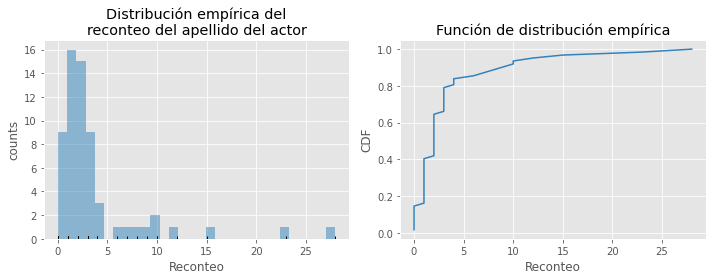

In [36]:
# Gráficos distribución observada (empírica)
# ==============================================================================
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# Histograma
axs[0].hist(x=datos, bins=30, color="#3182bd", alpha=0.5)
axs[0].plot(datos, np.full_like(datos, -0.01), '|k', markeredgewidth=1)
axs[0].set_title('Distribución empírica del\nreconteo del apellido del actor')
axs[0].set_xlabel('Reconteo')
axs[0].set_ylabel('counts')

# Función de Distribución Acumulada
# ecdf (empirical cumulative distribution function)
ecdf = ECDF(x=datos)
axs[1].plot(ecdf.x, ecdf.y, color="#3182bd")
axs[1].set_title('Función de distribución empírica')
axs[1].set_xlabel('Reconteo')
axs[1].set_ylabel('CDF')

plt.tight_layout()


---------------------
Resultados del ajuste
---------------------
Distribución:   norm
Dominio:        [-inf, inf]
Parámetros:     {'loc': 3.435483870967742, 'scale': 5.056522353777939}
Log likelihood: -188.45628489804287
AIC:            380.91256979608573
BIC:            385.1668385661759


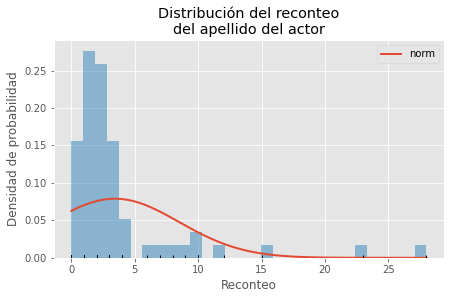

In [37]:
# Ajuste distribución normal
#===============================================================================
# 1) Se define el tipo de distribución
distribucion = stats.norm

# 2) Con el método fit() se obtienen los parámetros
parametros = distribucion.fit(data=datos)

# 3) Se crea un diccionario que incluya el nombre de cada parámetro
nombre_parametros = [p for p in inspect.signature(distribucion._pdf).parameters \
                     if not p=='x'] + ["loc","scale"]
parametros_dict = dict(zip(nombre_parametros, parametros))

# 3) Se calcula el log likelihood
log_likelihood = distribucion.logpdf(datos.to_numpy(), *parametros).sum()

# 4) Se calcula el AIC y el BIC
aic = -2 * log_likelihood + 2 * len(parametros)
bic = -2 * log_likelihood + np.log(datos.shape[0]) * len(parametros)

# 5) Gráfico
x_hat = np.linspace(min(datos), max(datos), num=100)
y_hat = distribucion.pdf(x_hat, *parametros)
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(x_hat, y_hat, linewidth=2, label=distribucion.name)
ax.hist(x=datos, density=True, bins=30, color="#3182bd", alpha=0.5)
ax.plot(datos, np.full_like(datos, -0.01), '|k', markeredgewidth=1)
ax.set_title('Distribución del reconteo\ndel apellido del actor')
ax.set_xlabel('Reconteo')
ax.set_ylabel('Densidad de probabilidad')
ax.legend()

#6) Información del ajuste
print('---------------------')
print('Resultados del ajuste')
print('---------------------')
print(f"Distribución:   {distribucion.name}")
print(f"Dominio:        {[distribucion.a, distribucion.b]}")
print(f"Parámetros:     {parametros_dict}")
print(f"Log likelihood: {log_likelihood}")
print(f"AIC:            {aic}")
print(f"BIC:            {bic}")

---------------------
Resultados del ajuste
---------------------
Distribución:   gamma
Dominio:        [0.0, inf]
Parámetros:     {'a': 0.5618283078418915, 'loc': -5.900940962342743e-29, 'scale': 1.8494210749464353}
Log likelihood: 69.88440133180077
AIC:            -133.76880266360155
BIC:            -127.38739950846627


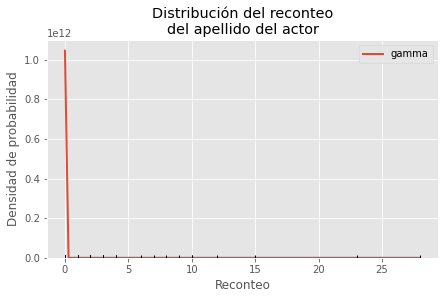

In [38]:
# Ajuste distribución normal
#===============================================================================
# 1) Se define el tipo de distribución
distribucion = stats.gamma

# 2) Con el método fit() se obtienen los parámetros
parametros = distribucion.fit(data=datos)

# 3) Se crea un diccionario que incluya el nombre de cada parámetro
nombre_parametros = [p for p in inspect.signature(distribucion._pdf).parameters \
                     if not p=='x'] + ["loc","scale"]
parametros_dict = dict(zip(nombre_parametros, parametros))

# 3) Se calcula el log likelihood
log_likelihood = distribucion.logpdf(datos.to_numpy(), *parametros).sum()

# 4) Se calcula el AIC y el BIC
aic = -2 * log_likelihood + 2 * len(parametros)
bic = -2 * log_likelihood + np.log(datos.shape[0]) * len(parametros)

# 5) Gráfico
x_hat = np.linspace(min(datos), max(datos), num=100)
y_hat = distribucion.pdf(x_hat, *parametros)
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(x_hat, y_hat, linewidth=2, label=distribucion.name)
ax.hist(x=datos, density=True, bins=30, color="#3182bd", alpha=0.5)
ax.plot(datos, np.full_like(datos, -0.01), '|k', markeredgewidth=1)
ax.set_title('Distribución del reconteo\ndel apellido del actor')
ax.set_xlabel('Reconteo')
ax.set_ylabel('Densidad de probabilidad')
ax.legend()

#6) Información del ajuste
print('---------------------')
print('Resultados del ajuste')
print('---------------------')
print(f"Distribución:   {distribucion.name}")
print(f"Dominio:        {[distribucion.a, distribucion.b]}")
print(f"Parámetros:     {parametros_dict}")
print(f"Log likelihood: {log_likelihood}")
print(f"AIC:            {aic}")
print(f"BIC:            {bic}")

In [39]:
from scipy import stats
import pandas as pd
import numpy as np
import tqdm
import inspect
import warnings
warnings.filterwarnings('ignore')

def seleccionar_distribuciones(familia='realall', verbose=True):
    '''
    Esta función selecciona un subconjunto de las distribuciones disponibles
    en scipy.stats
    
    Parameters
    ----------
    familia : {'realall', 'realline', 'realplus', 'real0to1', 'discreta'}
        realall: distribuciones de la familia `realline` + `realplus`
        realline: distribuciones continuas en el dominio (-inf, +inf)
        realplus: distribuciones continuas en el dominio [0, +inf)
        real0to1: distribuciones continuas en el dominio [0,1]
        discreta: distribuciones discretas
        
    verbose : bool
        Si se muestra información de las distribuciones seleccionadas
        (the default `True`).
        
    Returns
    -------
    distribuciones: list
        listado con las distribuciones (los objetos) seleccionados.
        
    Raises
    ------
    Exception
        Si `familia` es distinto de 'realall', 'realline', 'realplus', 'real0to1',
        o 'discreta'.
        
    Notes
    -----
        Las distribuciones levy_stable y vonmises han sido excluidas por el momento.

    '''
    
    distribuciones = [getattr(stats,d) for d in dir(stats) \
                     if isinstance(getattr(stats,d), (stats.rv_continuous, stats.rv_discrete))]
    
    exclusiones = ['levy_stable', 'vonmises']
    distribuciones = [dist for dist in distribuciones if dist.name not in exclusiones]
            
    dominios = {
        'realall' : [-np.inf, np.inf],
        'realline': [np.inf,np.inf],
        'realplus': [0, np.inf],
        'real0to1': [0, 1], 
        'discreta': [None, None],
    }

    distribucion = []
    tipo = []
    dominio_inf = []
    dominio_sup = []

    for dist in distribuciones:
        distribucion.append(dist.name)
        tipo.append(np.where(isinstance(dist, stats.rv_continuous), 'continua', 'discreta'))
        dominio_inf.append(dist.a)
        dominio_sup.append(dist.b)
    
    info_distribuciones = pd.DataFrame({
                            'distribucion': distribucion,
                            'tipo': tipo,
                            'dominio_inf': dominio_inf,
                            'dominio_sup': dominio_sup
                          })

    info_distribuciones = info_distribuciones \
                          .sort_values(by=['dominio_inf', 'dominio_sup'])\
                          .reset_index(drop=True)
    
    if familia in ['realall', 'realline', 'realplus', 'real0to1']:
        info_distribuciones = info_distribuciones[info_distribuciones['tipo']=='continua']
        condicion = (info_distribuciones['dominio_inf'] == dominios[familia][0]) & \
                    (info_distribuciones['dominio_sup'] == dominios[familia][1]) 
        info_distribuciones = info_distribuciones[condicion].reset_index(drop=True)
        
    if familia in ['discreta']:
        info_distribuciones = info_distribuciones[info_distribuciones['tipo']=='discreta']
        
    seleccion = [dist for dist in distribuciones \
                 if dist.name in info_distribuciones['distribucion'].values]
    
    
    if verbose:
        print("---------------------------------------------------")
        print("       Distribuciones seleccionadas                ")
        print("---------------------------------------------------")
        with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
            print(info_distribuciones)
    
    return seleccion


def comparar_distribuciones(x, familia='realall', ordenar='aic', verbose=True):
    '''
    Esta función selecciona y ajusta un subconjunto de las distribuciones 
    disponibles en scipy.stats. Para cada distribución calcula los valores de
    Log Likelihood, AIC y BIC.
    
    Parameters
    ----------
    x : array_like
        datos con los que ajustar la distribución.
        
    familia : {'realall', 'realline', 'realplus', 'real0to1', 'discreta'}
        realall: distribuciones de la familia `realline` + `realplus`
        realline: distribuciones continuas en el dominio (-inf, +inf)
        realplus: distribuciones continuas en el dominio [0, +inf)
        real0to1: distribuciones continuas en el dominio [0,1]
        discreta: distribuciones discretas
    
    ordenar : {'aic', 'bic'}
        criterio de ordenación de mejor a peor ajuste.
    
    verbose : bool
        Si se muestra información de las distribuciones seleccionadas
        (the default `True`).
        
    Returns
    -------
    resultados: data.frame
        distribucion: nombre de la distribución.
        log_likelihood: logaritmo del likelihood del ajuste.
        aic: métrica AIC.
        bic: métrica BIC.
        n_parametros: número de parámetros de la distribución de la distribución.
        parametros: parámetros del tras el ajuste
        
    Raises
    ------
    Exception
        Si `familia` es distinto de 'realall', 'realline', 'realplus', 'real0to1',
        o 'discreta'.
        
    Notes
    -----

    '''
    
    distribuciones = seleccionar_distribuciones(familia=familia, verbose=verbose)
    distribucion_ = []
    log_likelihood_= []
    aic_ = []
    bic_ = []
    n_parametros_ = []
    parametros_ = []
    
    for i, distribucion in enumerate(distribuciones):
        
        print(f"{i+1}/{len(distribuciones)} Ajustando distribución: {distribucion.name}")
        
        try:
            parametros = distribucion.fit(data=x)
            nombre_parametros = [p for p in inspect.signature(distribucion._pdf).parameters \
                                 if not p=='x'] + ["loc","scale"]
            parametros_dict = dict(zip(nombre_parametros, parametros))
            log_likelihood = distribucion.logpdf(x, *parametros).sum()
            aic = -2 * log_likelihood + 2 * len(parametros)
            bic = -2 * log_likelihood + np.log(x.shape[0]) * len(parametros)
            
            distribucion_.append(distribucion.name)
            log_likelihood_.append(log_likelihood)
            aic_.append(aic)
            bic_.append(bic)
            n_parametros_.append(len(parametros))
            parametros_.append(parametros_dict)
            
            resultados = pd.DataFrame({
                            'distribucion': distribucion_,
                            'log_likelihood': log_likelihood_,
                            'aic': aic_,
                            'bic': bic_,
                            'n_parametros': n_parametros_,
                            'parametros': parametros_,
                
                         })
            
            resultados = resultados.sort_values(by=ordenar).reset_index(drop=True)
            
        except Exception as e:
            print(f"Error al tratar de ajustar la distribución {distribucion.name}")
            print(e)
            print("")
            
    return resultados

In [40]:
# Ajuste y comparación de distribuciones
# ==============================================================================
resultados = comparar_distribuciones(
                x=datos.to_numpy(),
                familia='realall',
                ordenar='aic',
                verbose=False
            )
resultados

1/31 Ajustando distribución: cauchy
2/31 Ajustando distribución: crystalball
3/31 Ajustando distribución: dgamma
4/31 Ajustando distribución: dweibull
5/31 Ajustando distribución: exponnorm
6/31 Ajustando distribución: genextreme
7/31 Ajustando distribución: genhyperbolic
8/31 Ajustando distribución: genlogistic
9/31 Ajustando distribución: gennorm
10/31 Ajustando distribución: gumbel_l
11/31 Ajustando distribución: gumbel_r
12/31 Ajustando distribución: hypsecant
13/31 Ajustando distribución: johnsonsu
14/31 Ajustando distribución: kappa4
15/31 Ajustando distribución: laplace
16/31 Ajustando distribución: laplace_asymmetric
17/31 Ajustando distribución: loggamma
18/31 Ajustando distribución: logistic
19/31 Ajustando distribución: loguniform
20/31 Ajustando distribución: moyal
21/31 Ajustando distribución: nct
22/31 Ajustando distribución: norm
23/31 Ajustando distribución: norminvgauss
24/31 Ajustando distribución: pearson3
25/31 Ajustando distribución: powernorm
26/31 Ajustando distr

,distribucion,log_likelihood,aic,bic,n_parametros,parametros
0,dweibull,-27.915236,61.830472,68.211875,3,"{'c': 0.7300646102458181, 'loc': 1.99999999999..."
1,dgamma,-71.285055,148.570110,154.951513,3,"{'a': 0.824123282622426, 'loc': 1.999999999999..."
2,gennorm,-79.566588,165.133175,171.514579,3,"{'beta': 0.10398629720113062, 'loc': 1.9999999..."
3,pearson3,-110.202155,226.404309,232.785712,3,"{'skew': 2.1231255806431757, 'loc': 2.16372302..."
4,laplace_asymmetric,-138.524771,283.049542,289.430945,3,"{'kappa': 0.008048903610686116, 'loc': -1.6407..."
5,exponnorm,-138.615244,283.230488,289.611891,3,"{'K': 2208.6463865583064, 'loc': -0.0051111510..."
6,genextreme,-139.160267,284.320535,290.701938,3,"{'c': -0.5576306631178198, 'loc': 1.2174867983..."
7,johnsonsu,-138.438036,284.876073,293.384610,4,"{'a': -5.5323563961735935, 'b': 0.875792023509..."
8,norminvgauss,-139.125175,286.250349,294.758887,4,"{'a': 47.485529349769195, 'b': 47.481096277855..."
9,nct,-139.180409,286.360819,294.869356,4,"{'df': 1.7984191413887523, 'nc': 21.5398296475..."


In [41]:
def plot_distribucion(x, nombre_distribucion, ax=None):
    '''
    Esta función superpone la curva de densidad de una distribución con el
    histograma de los datos.
    
    Parameters
    ----------
    x : array_like
        datos con los que ajustar la distribución.
        
    nombre_distribuciones : str
        nombre de una de las distribuciones disponibles en `scipy.stats`.
        
    Returns
    -------
    resultados: matplotlib.ax
        gráfico creado
        
    Raises
    ------
        
    Notes
    -----
    '''

    distribucion = getattr(stats, nombre_distribucion)

    parametros = distribucion.fit(data=x)

    nombre_parametros = [p for p in inspect.signature(distribucion._pdf).parameters \
                         if not p=='x'] + ["loc","scale"]
    parametros_dict = dict(zip(nombre_parametros, parametros))

    log_likelihood = distribucion.logpdf(x, *parametros).sum()

    aic = -2 * log_likelihood + 2 * len(parametros)
    bic = -2 * log_likelihood + np.log(x.shape[0]) * len(parametros)

    x_hat = np.linspace(min(x), max(x), num=100)
    y_hat = distribucion.pdf(x_hat, *parametros)
    
    if ax is None:
        fig, ax = plt.subplots(figsize=(7,4))
        
    ax.plot(x_hat, y_hat, linewidth=2, label=distribucion.name)
    ax.hist(x=x, density=True, bins=30, color="#3182bd", alpha=0.5);
    ax.plot(x, np.full_like(x, -0.01), '|k', markeredgewidth=1)
    ax.set_title('Ajuste distribución')
    ax.set_xlabel('x')
    ax.set_ylabel('Densidad de probabilidad')
    ax.legend()

    print('---------------------')
    print('Resultados del ajuste')
    print('---------------------')
    print(f"Distribución:   {distribucion.name}")
    print(f"Dominio:        {[distribucion.a, distribucion.b]}")
    print(f"Parámetros:     {parametros_dict}")
    print(f"Log likelihood: {log_likelihood}")
    print(f"AIC:            {aic}")
    print(f"BIC:            {bic}")
    
    return ax


def plot_multiple_distribuciones(x, nombre_distribuciones, ax=None):
    '''
    Esta función superpone las curvas de densidad de varias distribuciones
    con el histograma de los datos.
    
    Parameters
    ----------
    x : array_like
        datos con los que ajustar la distribución.
        
    nombre_distribuciones : list
        lista con nombres de distribuciones disponibles en `scipy.stats`.
        
    Returns
    -------
    resultados: matplotlib.ax
        gráfico creado
        
    Raises
    ------
        
    Notes
    -----
    '''
    
    if ax is None:
        fig, ax = plt.subplots(figsize=(7,4))
        
    ax.hist(x=x, density=True, bins=30, color="#3182bd", alpha=0.5)
    ax.plot(x, np.full_like(x, -0.01), '|k', markeredgewidth=1)
    ax.set_title('Ajuste distribuciones')
    ax.set_xlabel('x')
    ax.set_ylabel('Densidad de probabilidad')
    
    for nombre in nombre_distribuciones:
        
        distribucion = getattr(stats, nombre)

        parametros = distribucion.fit(data=x)

        nombre_parametros = [p for p in inspect.signature(distribucion._pdf).parameters \
                             if not p=='x'] + ["loc","scale"]
        parametros_dict = dict(zip(nombre_parametros, parametros))

        log_likelihood = distribucion.logpdf(x, *parametros).sum()

        aic = -2 * log_likelihood + 2 * len(parametros)
        bic = -2 * log_likelihood + np.log(x.shape[0]) * len(parametros)

        x_hat = np.linspace(min(x), max(x), num=100)
        y_hat = distribucion.pdf(x_hat, *parametros)
        ax.plot(x_hat, y_hat, linewidth=2, label=distribucion.name)
    
    ax.legend()
    
    return ax

---------------------
Resultados del ajuste
---------------------
Distribución:   dweibull
Dominio:        [-inf, inf]
Parámetros:     {'c': 0.7300646102458181, 'loc': 1.9999999999999996, 'scale': 4.289711210067809}
Log likelihood: -27.915235814135812
AIC:            61.830471628271624
BIC:            68.2118747834069


<AxesSubplot:title={'center':'Ajuste distribución'}, xlabel='x', ylabel='Densidad de probabilidad'>

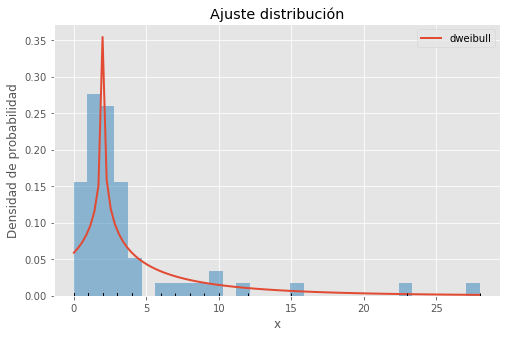

In [42]:
fig, ax = plt.subplots(figsize=(8,5))

plot_distribucion(
    x=datos.to_numpy(),
    nombre_distribucion=resultados['distribucion'][0],
    ax=ax
)

<AxesSubplot:title={'center':'Ajuste distribuciones'}, xlabel='x', ylabel='Densidad de probabilidad'>

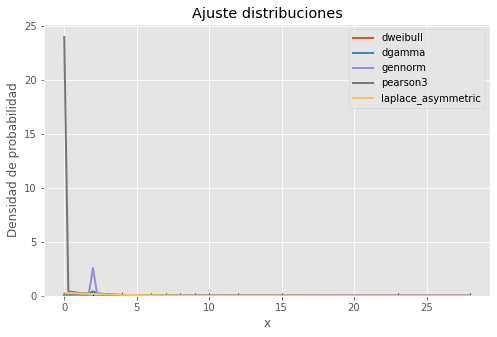

In [43]:
fig, ax = plt.subplots(figsize=(8,5))

plot_multiple_distribuciones(
    x=datos.to_numpy(),
    nombre_distribuciones=resultados['distribucion'][:5],
    ax=ax
)

In [44]:
# Definición de la distribución
distribucion = stats.t

# Ajuste para obtener el valor de los parámetros
parametros   = distribucion.fit(datos.to_numpy())

# Muestreo aleatorio
distribucion.rvs(*parametros, size=5)

array([1.01475332, 1.86172053, 0.73676062, 3.48883831, 4.01604277])